# 1. Contextualização
### o dataset foi tirado do UCI Machine Learning Repository e apresenta os dados de usuários de um banco tais como, a idade  a renda e dívida. A partir deste dados realizou-se  vários testes de amostragem e depois foi escolhido o que é mais representativo da população. Com amostra coletado  parâmetros ou seja métricas centralizadas e varia   

In [ ]:
import pandas as pd
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [ ]:
url = 'credit_data.csv'
#names = ['ID_Client ', 'Renda', 'Idade', 'Dívida', 'C_default']

In [ ]:
dt_credit = pd.read_csv(url, delimiter = ';')
dt_credit.head()

,i#clientid,income,age,loan,c#default
0,1,66155.93,59,8106.53,0
1,2,34415.15,48,6564.75,0
2,3,57317.17,63,8020.95,0
3,4,42709.53,46,6103.64,0
4,5,66952.69,19,8770.10,1


In [ ]:
dt_credit.shape

(2000, 5)

In [ ]:
#Tirando a linha 0
dt_credit.columns = ['ID_Client ', 'Renda', 'Idade', 'Dívida', 'Dívida_paga']
dt_credit.head()

,ID_Client,Renda,Idade,Dívida,Dívida_paga
0,1,66155.93,59,8106.53,0
1,2,34415.15,48,6564.75,0
2,3,57317.17,63,8020.95,0
3,4,42709.53,46,6103.64,0
4,5,66952.69,19,8770.10,1


In [ ]:
dt_credit.tail()

,ID_Client,Renda,Idade,Dívida,Dívida_paga
1995,1996,59221.04,49,1926.73,0
1996,1997,69516.13,23,3503.18,0
1997,1998,44311.45,28,5522.79,1
1998,1999,43756.06,64,1622.72,0
1999,2000,69436.58,56,7378.83,0


##Analise de amostragem

###1- Amostragem aleatória simples

In [ ]:
def amostragem_aleatoria_simples(dt, amostras ):
   return dt_credit.sample(n= amostras)

In [ ]:
df_aes= amostragem_aleatoria_simples(dt_credit,100)
df_aes.shape

(100, 5)

In [ ]:
df_aes.head()

,ID_Client,Renda,Idade,Dívida,Dívida_paga
71,72,38564.93,21,5604.17,1
904,905,27989.11,28,1770.82,0
1319,1320,29976.83,58,3796.03,0
1992,1993,30803.81,23,623.02,0
1366,1367,36024.94,52,4155.45,0


###2-Amostragem sistemática

In [ ]:
def amostragem_sistematica (dt, amostras):
  intervalo = len(dt_credit) // amostras
  rd.seed(1)
  inicio = rd.randint(0, intervalo)
  indices = np.arange(inicio, len(dt_credit), step=intervalo)
  amostragem_sistematica= dt_credit.iloc[indices]
  return amostragem_sistematica


In [ ]:
df_as = amostragem_sistematica(dt_credit, 100)
df_as.shape

(100, 5)

In [ ]:
df_as.head()

,ID_Client,Renda,Idade,Dívida,Dívida_paga
4,5,66952.69,19,8770.10,1
24,25,65301.98,49,5465.27,0
44,45,67852.11,47,5730.59,0
64,65,69078.60,25,4076.58,0
84,85,30483.30,34,4514.01,1


###3-Amostragem por grupos

In [ ]:
def amostragem_agrupamento(dt, numero_grupos):
  intervalo = len(dt_credit)/ numero_grupos

  grupos = []
  id_grupo = 0
  contagem = 0
  for _ in dt.iterrows():
    grupos.append(id_grupo)
    contagem  += 1
    if contagem > intervalo:
      contagem = 0
      id_grupo += 1
  dt_credit['grupos']= grupos
  rd.seed(1)
  grupos_selecionados = rd.randint(0,numero_grupos)
  return dt_credit[dt_credit['grupos']== grupos_selecionados]

In [ ]:
df_aag = amostragem_agrupamento(dt_credit, 20)
df_aag.shape, df_aag['grupos'].value_counts()

((101, 6), 4    101
 Name: grupos, dtype: int64)

In [ ]:
df_aag.head()

,ID_Client,Renda,Idade,Dívida,Dívida_paga,grupos
404,405,62553.67,64,4641.70,0,4
405,406,68147.96,23,12307.56,1,4
406,407,27619.66,48,2774.83,0,4
407,408,65330.19,29,4030.80,0,4
408,409,26680.15,48,1671.18,0,4


###4- Amostragem Estratificada

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
dt_credit['Dívida_paga'].value_counts()

0    1717
1     283
Name: Dívida_paga, dtype: int64

In [ ]:
1717/len(dt_credit), 283/len(dt_credit)

(0.8585, 0.1415)

In [ ]:
0.8585 + 0.1415

1.0

In [ ]:
def amostragem_estratificada(dt_credit, percentual):
    split = StratifiedShuffleSplit(test_size=percentual, random_state=1)
    for _, y in split.split (dt_credit, dt_credit['Dívida_paga']):
      df_y = dt_credit.iloc[y]

    return df_y

In [ ]:
100/len(dt_credit)

0.05

In [ ]:
df_ae = amostragem_estratificada(dt_credit, 0.05)
df_ae.shape

(100, 6)

In [ ]:
df_ae.head()

,ID_Client,Renda,Idade,Dívida,Dívida_paga,grupos
1285,1286,50208.53,35,729.60,0,12
1407,1408,60842.94,60,6608.97,0,13
1859,1860,60729.95,41,5006.85,0,18
1610,1611,69695.15,26,8418.25,1,15
516,517,66003.96,33,11207.50,1,5


###5-Amostragem  de reservatório

In [ ]:
def amostragem_reservatorio(dt_credit, amostras ):
  stream = []
  for i in range(len(dt_credit)):
    stream.append(i)
  i = 0
  tamanho = len(dt_credit)

  reservatorio = [0] * amostras
  for i in range(amostras):
    reservatorio[i] = stream[i]

  while  i < tamanho:
     j = rd.randrange(i+1)
     if j < amostras :
       reservatorio[i] = stream[i]
     i += 1
     return dt_credit.iloc[reservatorio]

In [ ]:
df_ar = amostragem_reservatorio(dt_credit, 100)
df_ar.shape

(100, 6)

In [ ]:
df_ar.head()

,ID_Client,Renda,Idade,Dívida,Dívida_paga,grupos
0,1,66155.93,59,8106.53,0,0
1,2,34415.15,48,6564.75,0,0
2,3,57317.17,63,8020.95,0,0
3,4,42709.53,46,6103.64,0,0
4,5,66952.69,19,8770.10,1,0


###2-Estudo comparativo de cada amostra

In [ ]:
#média populacional
dt_credit['Idade'].mean ()

40.935

In [ ]:
#média amostral
df_aes['Idade'].mean(), df_as['Idade'].mean(), df_ae['Idade'].mean(),df_aag['Idade'].mean(), df_ar['Idade'].mean()

(40.04, 40.46, 42.49, 39.198019801980195, 42.29)

###3-Amostragem sistemática selecionada

In [ ]:
df_aes.head()

,ID_Client,Renda,Idade,Dívida,Dívida_paga
71,72,38564.93,21,5604.17,1
904,905,27989.11,28,1770.82,0
1319,1320,29976.83,58,3796.03,0
1992,1993,30803.81,23,623.02,0
1366,1367,36024.94,52,4155.45,0


In [ ]:
df_aes.describe()

,ID_Client,Renda,Idade,Dívida,Dívida_paga
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,919.440000,46530.656800,40.040000,4572.858400,0.130000
std,618.997859,14283.071166,12.966873,2817.388541,0.337998
min,1.000000,22089.840000,18.000000,366.100000,0.000000
25%,316.250000,33552.072500,27.750000,2487.915000,0.000000
50%,921.500000,46832.235000,40.500000,4284.790000,0.000000
75%,1424.500000,59491.372500,52.000000,6293.702500,0.000000
max,1995.000000,69929.010000,62.000000,12427.840000,1.000000


Text(0, 0.5, 'Frequência')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


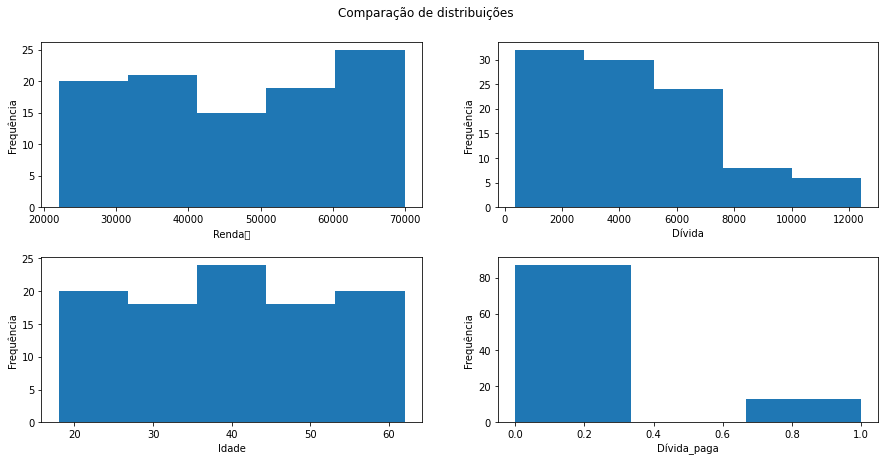

In [ ]:
from numpy.ma.core import size
from IPython.core.pylabtools import figsize
# Cria a figura e os subplots
fig = plt.figure()
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)
fig.set_size_inches(15, 7)
fig.suptitle('Comparação de distribuições', x= 0.4, y=.95, horizontalalignment = 'left', verticalalignment = 'top')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)


#Cria os gráficos de histograma e acerta os nomes dos eixos
ax1.hist(df_aes['Renda'], bins = 5)
ax1.set_xlabel('Renda	')
ax1.set_ylabel('Frequência')

ax2.hist(df_aes['Dívida'], bins = 5)
ax2.set_xlabel('Dívida')
ax2.set_ylabel('Frequência')

ax3.hist(df_aes['Idade'], bins = 5)
ax3.set_xlabel('Idade')
ax3.set_ylabel('Frequência')

ax4.hist(df_aes['Dívida_paga'], bins = 3)
ax4.set_xlabel('Dívida_paga')
ax4.set_ylabel('Frequência')




Text(0, 0.5, 'Emprestimo [R$]')

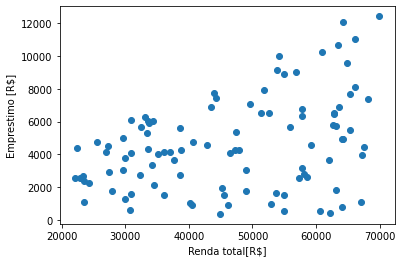

In [ ]:
fig = plt.figure()
plt.scatter(df_aes['Renda'], df_aes['Dívida'])
plt.xlabel('Renda total[R$]')
plt.ylabel('Emprestimo [R$]')

In [ ]:
np.corrcoef(df_aes['Renda'], df_aes['Dívida'])[0,1]

0.3699176544063897

Text(0, 0.5, 'Idade [Anos]')

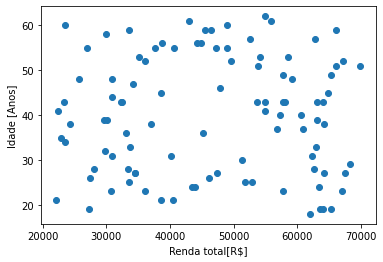

In [ ]:
fig = plt.figure()
plt.scatter(df_aes['Renda'], df_aes['Idade'])
plt.xlabel('Renda total[R$]')
plt.ylabel('Idade [Anos]')

In [ ]:
np.corrcoef(df_aes['Renda'], df_aes['Idade'])[0,1]

0.006979047186125846

Text(0, 0.5, 'Renda total[R$]')

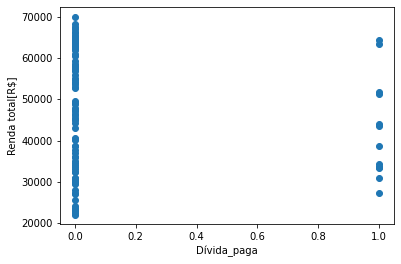

In [ ]:
fig = plt.figure()
plt.scatter (df_aes['Dívida_paga'],df_aes['Renda'])
plt.xlabel('Dívida_paga')
plt.ylabel('Renda total[R$]')

In [ ]:
np.corrcoef(df_aes['Renda'], df_aes['Dívida_paga'])[0,1]

-0.11502651565085144

Text(0.5, 1.0, 'Gráfico Box-plot')

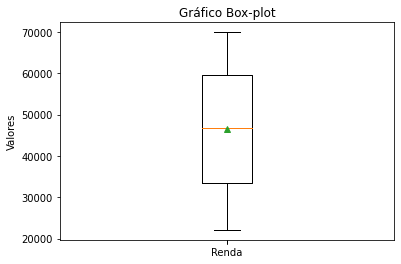

In [ ]:
fig = plt.figure()
plt.boxplot(df_aes ['Renda'], showmeans = True)
plt.xticks([1, 1, 1], ['Renda'])
plt.ylabel('Valores')
plt.title('Gráfico Box-plot', loc = 'center')

Text(0.5, 1.0, 'Gráfico Box-plot')

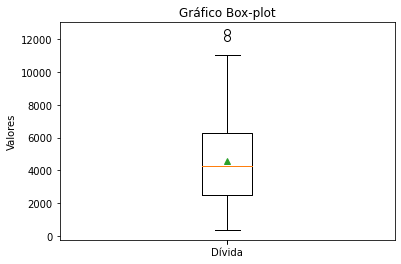

In [ ]:
fig = plt.figure()
plt.boxplot(df_aes ['Dívida'], showmeans = True)
plt.xticks([1, 1, 1], ['Dívida'])
plt.ylabel('Valores')
plt.title('Gráfico Box-plot', loc = 'center')